In [1]:
import pandas as pd
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import numpy as np
import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(bottom=0.15)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
movie_credit_file = './tmdb-5000-movie-dataset/tmdb_5000_credits.csv'
movie_file = './tmdb-5000-movie-dataset/tmdb_5000_movies.csv'

df_credit_file = pd.read_csv(movie_credit_file)
df_movie_file = pd.read_csv(movie_file)

In [4]:
#rename columns for subsequent merge
df_credit_file = df_credit_file.rename(columns = {'movie_id': 'id', 'title': 'original_title', 'cast':'cast', 'crew':'crew'})

#merge
df_merged = df_movie_file.merge(df_movie_file, how='left', on = 'original_title' )

#columns relevant for downloading images
df_data_download = df_merged[['id_x','original_title']]

In [5]:
df_credit_file.columns

Index(['id', 'original_title', 'cast', 'crew'], dtype='object')

In [6]:
df_merged.columns

Index(['budget_x', 'genres_x', 'homepage_x', 'id_x', 'keywords_x',
       'original_language_x', 'original_title', 'overview_x', 'popularity_x',
       'production_companies_x', 'production_countries_x', 'release_date_x',
       'revenue_x', 'runtime_x', 'spoken_languages_x', 'status_x', 'tagline_x',
       'title_x', 'vote_average_x', 'vote_count_x', 'budget_y', 'genres_y',
       'homepage_y', 'id_y', 'keywords_y', 'original_language_y', 'overview_y',
       'popularity_y', 'production_companies_y', 'production_countries_y',
       'release_date_y', 'revenue_y', 'runtime_y', 'spoken_languages_y',
       'status_y', 'tagline_y', 'title_y', 'vote_average_y', 'vote_count_y'],
      dtype='object')

In [7]:
IDNumber = 26963
q = df_merged.loc[df_merged['id_x'] == IDNumber] 
genres = q["genres_x"]
print(str(genres))

3282    [{"id": 16, "name": "Animation"}, {"id": 10751...
Name: genres_x, dtype: object


In [8]:
# The following is used to vectorize the genres. 


###NOTE: by using the following command, we are using the full dataset again,
###and INCLUDING entries with budgets < minBudget

df_genres = df_merged[['original_title', 'id_x', 'genres_x']]

##### Use this command if you want to make sure we're looking at the 
#### same entries as in df_budgets. i.e. EXCLUDING entries with budgets < minBudget

# df_genres = df_dropped_minBudgets[['original_title', 'id_x', 'genres_x']]

In [9]:
df_genres.head()

,original_title,id_x,genres_x
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [10]:
def lookForGenre(genre):
    df_genres[genre] = (df_genres['genres_x'].str.contains(genre))*1    

In [11]:
#We used all genres listed in TMDB

allGenres = ['Action', 'Thriller', 'Adventure', 'Animation', 'Western', 'Comedy', 'Crime', 'Drama', 'Horror', 
             'Romance', 'Science Fiction', 'Fantasy',  'Family', 'Documentary', 'History', 'Music', 'Mystery',
             'TV Movie', 'War']

for genre in allGenres:
    lookForGenre(genre)

    
#This provides a count of each genre
df_genres['Total genres per movie'] = df_genres[df_genres.columns[3:]].sum(axis=1)

df_totals = np.sum(df_genres[df_genres.columns[3:]])

df_totals

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Action                     1155
Thriller                   1274
Adventure                   791
Animation                   234
Western                      82
Comedy                     1723
Crime                       697
Drama                      2299
Horror                      519
Romance                     894
Science Fiction             536
Fantasy                     425
Family                      514
Documentary                 110
History                     197
Music                       185
Mystery                     348
TV Movie                      8
War                         144
Total genres per movie    12135
dtype: int64

Text(0,0.5,'Number of movies')

/home/shared/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


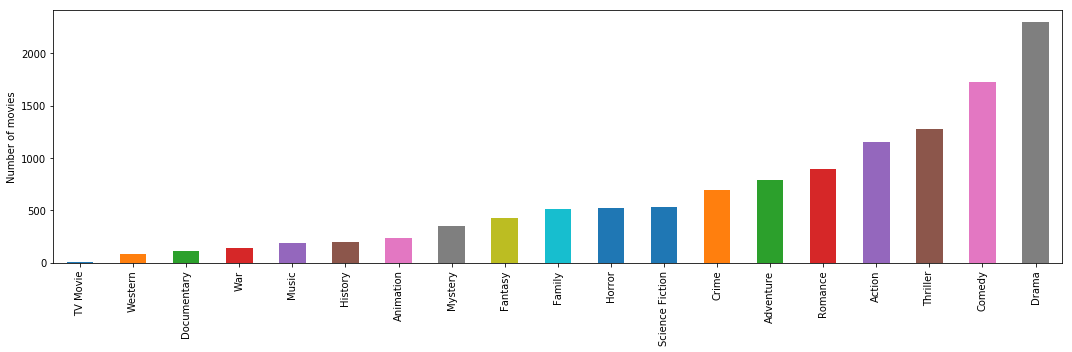

In [12]:
df_totals = np.sum(df_genres[df_genres.columns[3:-1]])

df_totals.sort_values(ascending = True).plot(kind='bar', legend=False, figsize=(15,5))
plt.ylabel('Number of movies')


In [12]:
#eliminates movies without any genres tagged
df_genres_updated = df_genres.loc[df_genres['Total genres per movie'] > 0]


###the following adds a "filename" column to df_genres_updated
#making series with prefix and suffix
df_genres_updated['id_x'] = df_genres_updated['id_x'].astype(str)
df_genres_updated['pre'] = 'm_'
df_genres_updated['post'] = '.jpg'
df_genres_updated['filename'] = df_genres_updated['pre'] + df_genres_updated['id_x'] + df_genres_updated['post']

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [13]:
## this is to make a .csv file with the filename as the first column and the genres as the rest
## This file contains ALL movies

id_genres_columns = ['filename', 'Action', 'Thriller', 'Adventure',
       'Animation', 'Western', 'Comedy', 'Crime', 'Drama', 'Horror', 'Romance',
       'Science Fiction', 'Fantasy', 'Family', 'Documentary', 'History',
       'Music', 'Mystery', 'TV Movie', 'War']

df_filename_genres = df_genres_updated[id_genres_columns]

genreList = df_filename_genres.to_csv("filename_genre_labels.csv")

In [14]:
df_genres_updated

,original_title,id_x,genres_x,Action,Thriller,Adventure,Animation,Western,Comedy,Crime,...,Documentary,History,Music,Mystery,TV Movie,War,Total genres per movie,pre,post,filename
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,4,m_,.jpg,m_19995.jpg
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_285.jpg
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,1,...,0,0,0,0,0,0,3,m_,.jpg,m_206647.jpg
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1,1,0,0,0,0,1,...,0,0,0,0,0,0,4,m_,.jpg,m_49026.jpg
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_49529.jpg
5,Spider-Man 3,559,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_559.jpg
6,Tangled,38757,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,m_,.jpg,m_38757.jpg
7,Avengers: Age of Ultron,99861,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_99861.jpg
8,Harry Potter and the Half-Blood Prince,767,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_767.jpg
9,Batman v Superman: Dawn of Justice,209112,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,...,0,0,0,0,0,0,3,m_,.jpg,m_209112.jpg


In [15]:
len(df_filename_genres)

4779

In [16]:
print(len(df_genres))  #these are all the movies
print(len(df_genres_updated)) #these are all the movies with >0 genres tagged
print(len(df_filename_genres))

4807
4779
4779


In [17]:
print('Median: %s' % np.median(df_genres['Total genres per movie']))
print('Mean: %s' % np.mean(df_genres['Total genres per movie']))
print('Variance: %s' % np.var(df_genres['Total genres per movie']))

Median: 2.0
Mean: 2.524443519866861
Variance: 1.257515682632809


In [18]:
print('Median: %s' % np.median(df_genres_updated['Total genres per movie']))
print('Mean: %s' % np.mean(df_genres_updated['Total genres per movie']))
print('Variance: %s' % np.var(df_genres_updated['Total genres per movie']))

Median: 2.0
Mean: 2.539234149403641
Variance: 1.227326553041831


In [19]:
print(len(df_genres))
print(len(df_genres_updated))

4807
4779


In [20]:
df_noGenres = df_genres.loc[df_genres['Total genres per movie'] == 0]
len(df_noGenres)

28

In [21]:
print(list(df_noGenres['id_x']))

[191229, 346081, 371085, 48382, 325140, 357834, 137955, 206412, 219716, 335874, 279759, 331493, 294550, 380097, 297100, 325579, 198370, 328307, 281189, 162396, 365052, 300327, 320435, 194588, 176074, 282128, 38786, 126186]


In [ ]:
#### the following was code to understand the distribution of the budget


#elimate the entries below minBudget. We don't know if the $0 budgets are missing values or mistakes, 
#so for now we're leaving them out

minBudget = 10000

df_dropped_minBudgets = df_merged.loc[df_merged['budget_x'] > minBudget]

print(len(df_merged))
print(len(df_dropped_minBudgets))
print('Number of entries eliminated: %s' % (len(df_merged)-len(df_dropped_minBudgets)))



#the following is to visualize the distribution of the budget values


#to visualize
df_budget = df_dropped_minBudgets.groupby(['budget_x']).count()
df_budget.plot(kind='bar', legend=False, figsize=(15,5))
plt.ylabel('Number of entries')

#to get statistics about the budget values
df_dropped_minBudgets = df_dropped_minBudgets.sort_values(by=['budget_x'])

percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
descriptives = df_dropped_minBudgets.budget_x.describe(percentiles=percentiles)

descriptives

#to make bins and labels that correspond to the percentages in "descriptives"
bins = descriptives.values[4:15]
labels = np.arange(0,10)

bins[0] =0

print(len(labels))
print(len(bins))



#####df_budgets is the dataframe with budgetlabels and only includes entries with budgets > minBudget

df_dropped_minBudgets['budget_labels'] = pd.cut(df_dropped_minBudgets['budget_x'], bins=bins, labels=labels)

df_budgets = df_dropped_minBudgets[['budget_x', 'id_x', 'original_title', 'budget_labels']]